# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [3]:
'''%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()'''

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [6]:
amostra = get_sample(athletes, 'height', n=3000)

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [6]:
def q1():
    result_q1 = sct.shapiro(amostra)
    return result_q1[1] > 0.05

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    Não, pois apenas pela análise do gráfico poderíamos dizer que se trata de uma distribuição próxima à uma distribuição normal.
    
    
* Plote o qq-plot para essa variável e a analise.

    Mais uma vez o gráfico aponta uma distribuição próxima do normal, o que pode indicar estarmos diante de um erro tipo I.
    

* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

    Não, pois o valor de $p$ encontrado é muito baixo nessa amostra. Entretanto, se pegássemos uma amostra com tamanho bem menor (abaixo de 350) começamos a encontrar valores diferentes para o mesmo teste, com o mesmo nível de significância.

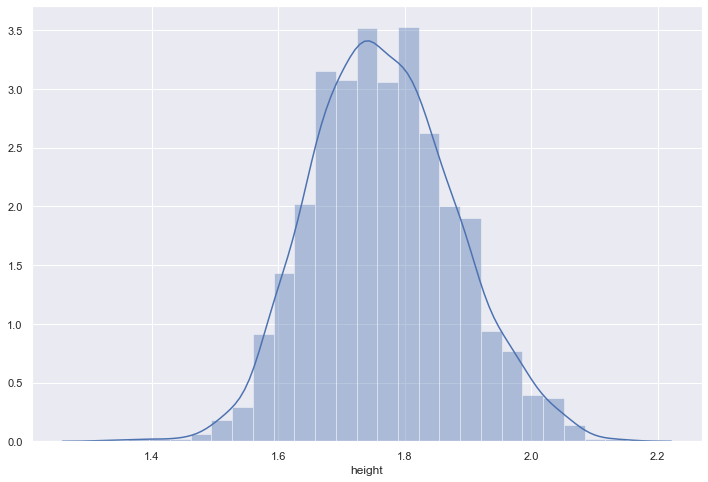

In [22]:
#Histograma da variável
sns.distplot(amostra, bins=25)

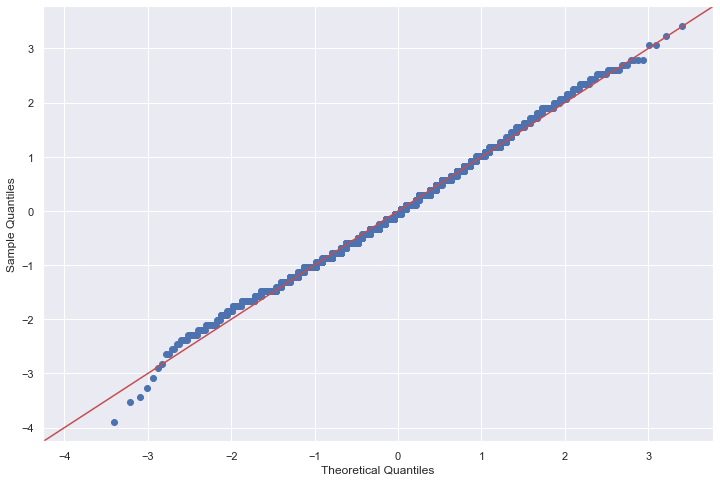

In [32]:
#QQ-plot da variável
sm.qqplot(amostra, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [7]:
def q2():
    result_q2 = sct.jarque_bera(amostra)
    return bool(result_q2[1] > 0.05)

__Para refletir__:

* Esse resultado faz sentido?

    Esse resultado foi o mesmo obtido com o teste de Shapiro, o que afirma que há evidências que a amostra não se trata de uma distruibição normal.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [7]:
amostra2 = get_sample(athletes, 'weight', n=3000)

In [ ]:
def q3():    
    result_q3 = sct.normaltest(amostra2)
    return bool(result_q3[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    Sim, o formato do gráfico mostra uma média descentralizada dos dados, havendo a formação de uma cauda mais longa de um dos lados do histograma, o que indica não se tratar de uma distribuição normal.
    
    
* Um _box plot_ também poderia ajudar a entender a resposta.

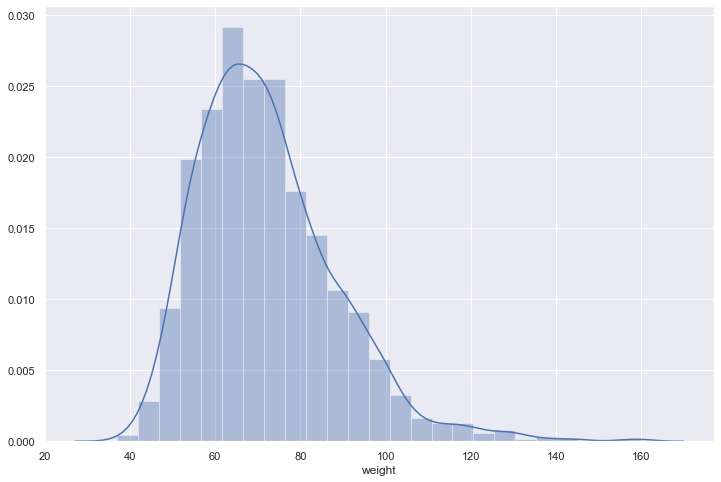

In [70]:
sns.distplot(amostra2, bins=25)

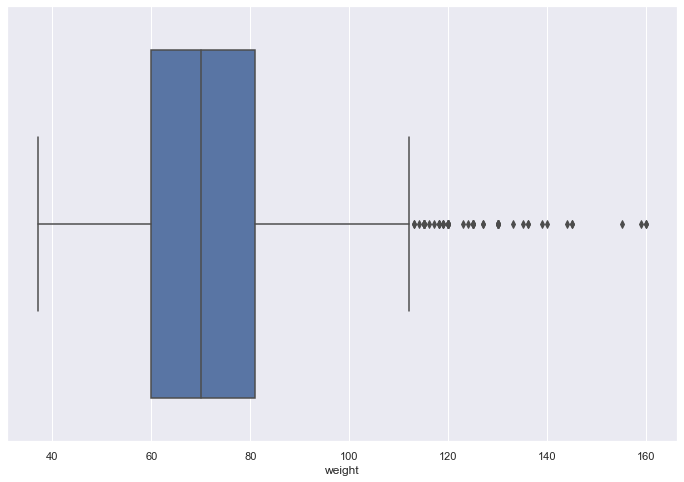

In [71]:
#Boxplot da amostra, mostrando haver vários outliers e um posicionamento da mediana mais próximo do valor mínimo da amostra.
sns.boxplot(amostra2)

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [67]:
amostra2_log = np.log(amostra2)

In [ ]:
def q4():
    result_q4 = sct.normaltest(amostra2_log)
    return bool(result_q4[1] > 0.05)

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?

    Apesar de o gráfico ter diminuído a cauda alongada, a média dos dados ainda não está bem centralizada, de maneira que o gráfico está condizente com o resultado.
    
    
* Você esperava um resultado diferente agora?

    Talvez. A tranformação logarítimica pode diminuir o viés de uma distribuição que possui um dos lado elevados ou uma cauda alongada, mas não é certo.

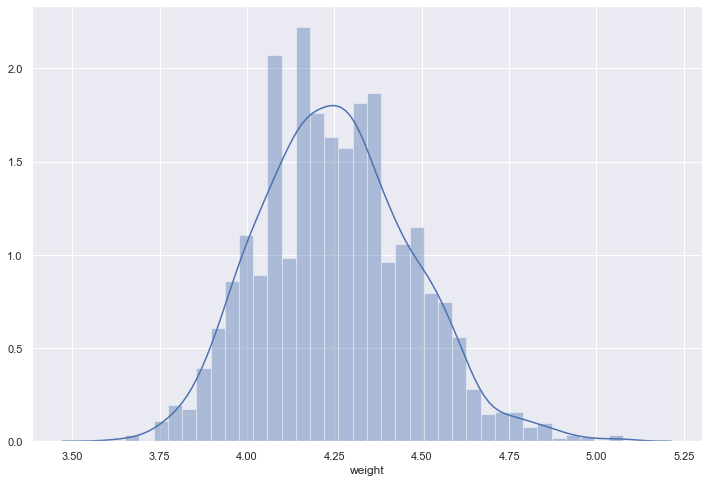

In [68]:
sns.distplot(amostra2_log)

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [19]:
bra = athletes.loc[athletes.nationality == 'BRA', ['height']]
usa = athletes.loc[athletes.nationality == 'USA', ['height']]
can = athletes.loc[athletes.nationality == 'CAN', ['height']]

In [ ]:
def q5():
    stats, p = sct.ttest_ind(bra, usa, equal_var = False, nan_policy = 'omit')
    return float(p) > 0.05

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [11]:
def q6():
    stats, p = sct.ttest_ind(bra, can, equal_var = False, nan_policy = 'omit')
    return float(p) > 0.05

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [12]:
def q7():
    stats, p = sct.ttest_ind(usa, can, equal_var = False, nan_policy = 'omit')
    return float(np.round(float(p), 8))

__Para refletir__:

* O resultado faz sentido?

    A diferença entre as médias das amostras apresentadas fica de cerca de 2cm a 3 cm entre brasileiros e americanos e canadenses e americanos, e portanto nesses casos há evidências para rejeitar a hipótese nula, que é de que as médias de altura dos atletas são iguais. Já entre a média de alturas da amostra de brasileiros e canadenses, a diferença ficou em 0.05. Desta forma, não podemos rejeitar a hipótese nula apenas diante dessa amostra apresentada. Desta forma, o resultado apresentado faz sentido, tendo em vista, principalmente, que realizamos o experimento apenas com uma amostra da população uma única vez.
    
    
* Você consegue interpretar esse p-valor?

    O p-valor é interpretado como o que se espera que aconteça com o mesmo experimento quando feito diversas vezes com amostras diferentes. Desta forma, espera-se que com amostras diferentes das alturas dos atletas dessas nacionalidades, a comparação das médias saia da diferença aceitável apenas 5% das vezes tentadas. Fazendo-se vários testes em que aponta-se que não se pode rejeitar a hipótese nula, portanto, não há provas que as médias são iguais, mas há boa chance de ser.


* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

    No teste da questão 5 o p-valor encontrado foi de __0.0013__, e localizado através do t-valor na tabela t o p-valor ficou __entre 0.002 e 0.001__.
    No teste da questão 6 o p-valor encontrado foi de __0.5230__, e localizado através do t-valor na tabela t o p-valor ficou __entre 1.0 e 0.5__.
    No teste da questão 7 o p-valor encontrado foi de __0.00046__, e localizado através do t-valor na tabela t o p-valor ficou __abaixo de 0.001__.

In [51]:
bra.mean() - usa.mean()

height   -0.023734
dtype: float64

In [49]:
bra.mean() - can.mean()

height    0.00544
dtype: float64

In [50]:
usa.mean() - can.mean()

height    0.029174
dtype: float64

In [25]:
stats1, p1 = sct.ttest_ind(bra, usa, equal_var = False, nan_policy = 'omit')
float(stats1), float(p1)

(-3.2232436467501855, 0.0013080041830140115)

In [26]:
stats2, p2 = sct.ttest_ind(bra, can, equal_var = False, nan_policy = 'omit')
float(stats2), float(p2)

(0.6389304914365109, 0.5230827295440921)

In [27]:
stats3, p3 = sct.ttest_ind(usa, can, equal_var = False, nan_policy = 'omit')
float(stats3), float(p3)

(3.516987632488539, 0.0004660129347389851)